Загрузка библиотек:

In [3]:
import torch
import numpy as np
from torch import nn
import torchvision
import torch.nn.functional as F
from torch import optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

Загрузка данных:

In [4]:
train_dataset = torchvision.datasets.CIFAR10(root='data/', train=True, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


Проверка данных:

torch.Size([3, 32, 32]) torch.Size([3, 32, 32])
8 4


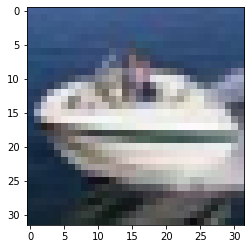

In [5]:
image_tr, label_tr = train_dataset[222]
image_tst, label_tst = test_dataset[555]
print (image_tr.size(), image_tst.size())
print (label_tr, label_tst)
plt.imshow(image_tr.permute(1, 2, 0).numpy())

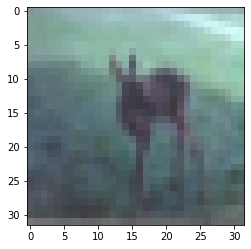

In [6]:
plt.imshow(image_tst.permute(1, 2, 0).numpy())

In [7]:
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

В первоначальной модели из методички мы изменим: SDG на Adam с то же скоростью обучения, увеличим количество эпох до 10.

In [8]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        return x

    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.softmax(x)
        return x


net = Net(3072, 100, 10)
net.train()

Net(
  (fc1): Linear(in_features=3072, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)

In [9]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.01)

In [10]:
num_epoch = 10

for epoch in range(num_epoch):  
    running_loss = 0.0
    running_items = 0.0

    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_items +=len(labels)
        if i % 300 == 0:
            print(f'Epoch [{epoch + 1}/{num_epoch}], ' \
                  f'Step [{i+1}/{len(train_loader)}], ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

print('Training is finished!')

Epoch [1/10], Step [1/782], Loss: 0.036
Epoch [1/10], Step [301/782], Loss: 0.035
Epoch [1/10], Step [601/782], Loss: 0.047
Epoch [2/10], Step [1/782], Loss: 0.030
Epoch [2/10], Step [301/782], Loss: 0.031
Epoch [2/10], Step [601/782], Loss: 0.030
Epoch [3/10], Step [1/782], Loss: 0.029
Epoch [3/10], Step [301/782], Loss: 0.029
Epoch [3/10], Step [601/782], Loss: 0.028
Epoch [4/10], Step [1/782], Loss: 0.025
Epoch [4/10], Step [301/782], Loss: 0.028
Epoch [4/10], Step [601/782], Loss: 0.027
Epoch [5/10], Step [1/782], Loss: 0.028
Epoch [5/10], Step [301/782], Loss: 0.027
Epoch [5/10], Step [601/782], Loss: 0.027
Epoch [6/10], Step [1/782], Loss: 0.030
Epoch [6/10], Step [301/782], Loss: 0.027
Epoch [6/10], Step [601/782], Loss: 0.027
Epoch [7/10], Step [1/782], Loss: 0.034
Epoch [7/10], Step [301/782], Loss: 0.027
Epoch [7/10], Step [601/782], Loss: 0.027
Epoch [8/10], Step [1/782], Loss: 0.027
Epoch [8/10], Step [301/782], Loss: 0.026
Epoch [8/10], Step [601/782], Loss: 0.027
Epoch [9

In [11]:
data_iter = iter(test_loader)
images, labels = next(data_iter)

Валидация:

LABELS:  cat ship ship plane frog frog car frog


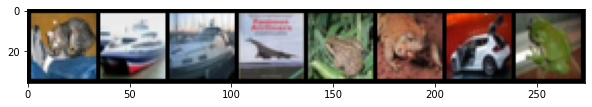

In [12]:
net.eval()
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(10,5))
plt.imshow(imgs.permute(1,2,0).numpy())
print("LABELS: ",' '.join(classes[labels[j]] for j in range(len(labels))))

Предстазания и подсчет результатов:

In [13]:
net.predict(images)

<ipython-input-8-a87c35eb1eab>:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([[3.1414e-02, 9.3027e-03, 5.1334e-02, 4.4761e-01, 1.1031e-02, 3.1267e-01,
         7.4080e-02, 1.5068e-02, 3.7774e-02, 9.7123e-03],
        [8.2585e-02, 5.6927e-02, 1.0461e-02, 1.7898e-02, 5.6651e-03, 4.8918e-03,
         3.7813e-03, 1.0240e-02, 4.8841e-01, 3.1914e-01],
        [1.1664e-01, 2.7825e-02, 1.0110e-02, 1.4813e-02, 5.1361e-03, 5.9922e-03,
         1.4603e-03, 5.7952e-03, 7.3899e-01, 7.3240e-02],
        [3.6322e-01, 3.7792e-02, 5.6856e-02, 4.6690e-02, 2.7777e-02, 2.9146e-02,
         3.0571e-03, 8.1295e-02, 2.8323e-01, 7.0938e-02],
        [2.2643e-02, 4.7556e-03, 2.2125e-01, 5.8995e-02, 3.0965e-01, 7.4861e-02,
         1.9945e-01, 9.6839e-02, 5.2789e-03, 6.2792e-03],
        [5.4255e-03, 1.4653e-02, 6.7631e-02, 2.2198e-01, 8.4038e-02, 1.3757e-01,
         3.4552e-01, 8.5902e-02, 4.2219e-03, 3.3065e-02],
        [3.5323e-04, 1.4528e-03, 2.5863e-03, 7.4525e-01, 1.5186e-03, 2.1240e-01,
         1.1849e-02, 8.0241e-03, 9.2104e-03, 7.3639e-03],
        [6.3165e-03, 1.9443

In [14]:
_, predicted = torch.max(outputs, 1)
print(predicted)
print("LABELS: ",' '.join(classes[predicted[j]] for j in range(len(labels))))

tensor([3, 8, 8, 0, 4, 6, 3, 6])
LABELS:  cat ship ship plane deer frog cat frog


In [15]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog']
['cat' 'ship' 'ship' 'plane' 'deer' 'frog' 'cat' 'frog']
Accuracy is 0.75


Как видно из результатов, точность возросла до 75%.